In [1]:
# load required packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [34]:
# fetch data
# dataset kaggle url: https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction
# --> downloaded, then manually uploaded via jupyter notebook to respository folder
#raw_train = pd.read_csv('train.csv')
#raw_test = pd.read_csv('test.csv')
# the dataset comes from kaggle is split into "train" and "test"
# but "test" does not contain Reponse --> will start with "train" only here
df = pd.read_csv('train.csv')
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [90]:
# split into train/test/valid right from the beginning, even before EDA
# want 60/20/20 train/test/valid split
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state=30)
df_train, df_valid = train_test_split(df_train_full, train_size = 0.75, test_size = 0.25, random_state=11)
y_train = df_train.Response#.values
y_test = df_train.Response#.values
y_valid = df_valid.Response#.values
#del df_train['Response']
#del df_test['Response']
#del df_valid['Response']

In [57]:
# EDA

In [58]:
print('The full dataframe contains', df.shape[0], 'observations and', df.shape[1], 'columns')
print('The columns are \n', df.columns.values.tolist())

The full dataframe contains 381109 observations and 12 columns
The columns are 
 ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


In [59]:
print('The train dataframe contains', df_train.shape[0], 'observations and', df_train.shape[1], 'columns')
print('The columns are \n', df_train.columns.values.tolist())

The train dataframe contains 228665 observations and 11 columns
The columns are 
 ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


<AxesSubplot:ylabel='None'>

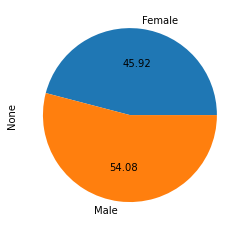

In [60]:
# univariate EDA
# Gender
df_train.groupby('Gender').size().plot(kind='pie', autopct='%.2f')
# 46% female, 54% male

<AxesSubplot:xlabel='Age'>

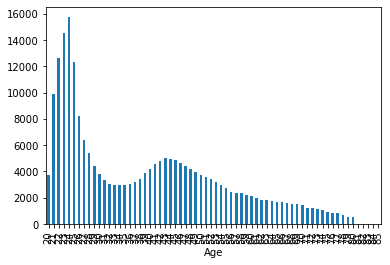

In [65]:
# Age
df_train.groupby('Age').size().plot(kind='bar')
# most people in mid-20s and mid-40s

<AxesSubplot:>

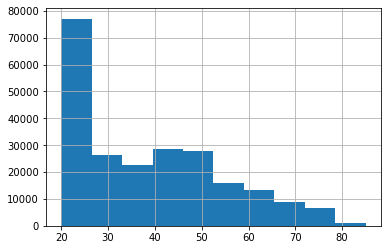

In [66]:
df_train.Age.hist()

<AxesSubplot:ylabel='None'>

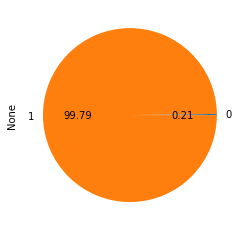

In [67]:
# Driving_License
df_train.groupby('Driving_License').size().plot(kind='pie', autopct='%.2f')
# almost no people without license -- makes sense given context

28.0    63617
8.0     20261
46.0    12003
41.0    10969
15.0     7991
30.0     7277
29.0     6645
50.0     6093
11.0     5592
3.0      5588
36.0     5300
33.0     4583
47.0     4378
35.0     4172
6.0      3801
45.0     3426
37.0     3321
18.0     3062
14.0     2825
39.0     2801
48.0     2773
10.0     2683
21.0     2532
13.0     2483
2.0      2420
7.0      1973
12.0     1875
9.0      1824
27.0     1688
32.0     1673
43.0     1588
26.0     1553
25.0     1539
17.0     1534
24.0     1427
38.0     1257
0.0      1210
23.0     1208
31.0     1186
20.0     1180
16.0     1180
49.0     1111
4.0      1097
34.0     1004
19.0      920
22.0      780
40.0      776
5.0       771
1.0       604
44.0      483
42.0      353
52.0      162
51.0      113
Name: Region_Code, dtype: int64

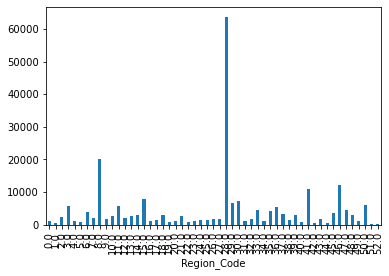

In [68]:
# Region_Code
df_train.groupby('Region_Code').size().plot(kind='bar')
# high concentration in one (most likely metropolitan) region; 60k obs there
df_train.Region_Code.value_counts()
# --> "region 28" 64k obs

<AxesSubplot:ylabel='None'>

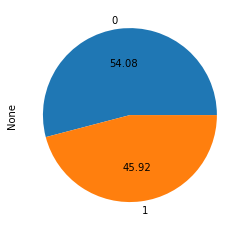

In [69]:
# Previously_Insured
df_train.groupby('Previously_Insured').size().plot(kind='pie', autopct='%.2f')
# 46% previously insured, 54% not 

<AxesSubplot:xlabel='Vehicle_Age'>

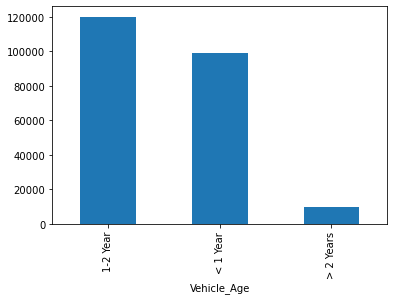

In [70]:
# Vehicle_Age
df_train.groupby('Vehicle_Age').size().plot(kind='bar')
# age only available grouped; oldest group = "> 2 Years" (!)

<AxesSubplot:ylabel='None'>

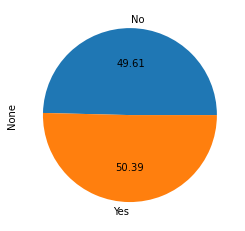

In [71]:
# Vehicle_Damage
df_train.groupby('Vehicle_Damage').size().plot(kind='pie', autopct='%.2f')
# almost exactly 50/50 split between 'previous damage' and 'no previous damange'

2630.0     39073
69856.0       84
39008.0       24
31470.0       24
29333.0       24
           ...  
19868.0        1
18285.0        1
68225.0        1
66103.0        1
72475.0        1
Name: Annual_Premium, Length: 43095, dtype: int64

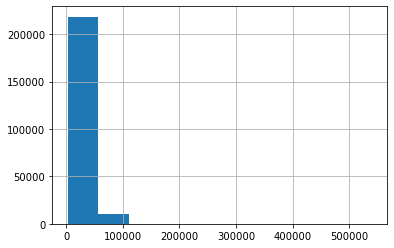

In [73]:
# Annual_Premium
df_train.Annual_Premium.hist()
# almost all annual premiums in 0-50'000 range but apparently there are also some very high outliers
df_train.Annual_Premium.value_counts()
# --> see: 39'073 obs with what appears to be some standard contract @ 2'630 premium

152.0    81041
26.0     47846
124.0    44220
160.0    13078
156.0     6405
         ...  
75.0         1
79.0         1
123.0        1
74.0         1
102.0        1
Name: Policy_Sales_Channel, Length: 152, dtype: int64

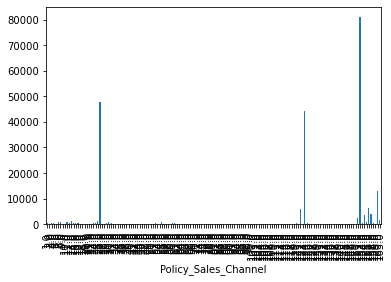

In [75]:
# Policy_Sales_Channel
df_train.groupby('Policy_Sales_Channel').size().plot(kind='bar')
# many different channels, but very high concentration around 3 (4?) main ones --> see below
df_train.Policy_Sales_Channel.value_counts()

<AxesSubplot:>

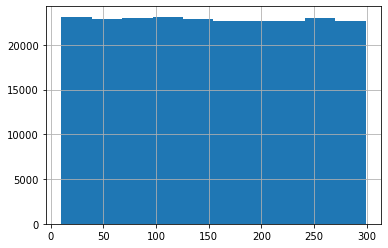

In [76]:
# Vintage
df_train.Vintage.hist()
# vintage of client relationship surprisingly evenly distributed
# the sample may have been created in a particular way to result in this distribution

<AxesSubplot:ylabel='Response'>

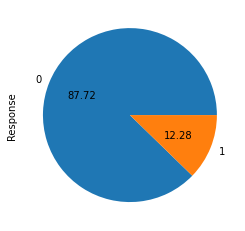

In [87]:
# Response
#df_train.groupby('Response').size().plot(kind='pie', autopct='%.2f')
# deleted Response from df_train and kept y as value so need to adjust slightly
y_train.value_counts().plot(kind='pie', autopct='%.2f')
# 12.3% of the sample 

In [88]:
# check for missing values
df_train.isna().sum()
# --> none!

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [93]:
# feature importance analysis
global_mean = y_train.mean()
global_mean

0.12277786281241117

In [106]:
categorical = ['Gender', 'Driving_License', 'Region_Code',
               'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
               'Policy_Sales_Channel']
for col in categorical:
    df_group = df_train_full.groupby(by=col).Response.agg(['mean'])
    df_group['n'] = df_train_full.groupby(by=col).size()
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group.sort_values('n', ascending=False))
    
# 13.8% of males take insurance vs. 10.4% of females
# 12.3% of sample with driving license take insurance vs. 5.1% of without
# region 28 (by far most represented) also has high mean of insurance takers (18.8% vs. 12.3% global mean)
# share of insurance takers among those with existing insurance ("previously insured") is next to zero
# owners of "older" vehicles opt for insurance far more often than others (who likely already have insurance?)
# those without prior damage are very unlikely to take insurance
# often observed sales channels are fairly effective (26: 19.9%, 124: 19.0%) yet most observed 152: 2.9%

mean       n      diff      risk
Gender                                      
Male    0.138682  164902  0.015905  1.129539
Female  0.104340  139985 -0.018438  0.849825

mean       n      diff      risk
Driving_License                                      
1                0.123065  304255  0.000287  1.002335
0                0.050633     632 -0.072145  0.412394

mean      n      diff      risk
Region_Code                                     
28.0         0.188294  84915  0.065516  1.533617
8.0          0.096143  27095 -0.026635  0.783066
46.0         0.103717  15928 -0.019061  0.844751
41.0         0.121983  14584 -0.000795  0.993526
15.0         0.071907  10611 -0.050871  0.585663
30.0         0.073994   9744 -0.048784  0.602668
29.0         0.121326   8811 -0.001452  0.988172
50.0         0.063144   8156 -0.059634  0.514292
11.0         0.113027   7423 -0.009751  0.920582
3.0          0.130047   7405  0.007269  1.059208
36.0         0.083098   7088 -0.039680  0.676817
33.0         0.101268   6152 -0.021510  0.824806
47.0         0.085370   5892 -0.037408  0.695321
35.0         0.124506   5566  0.001728  1.014075
6.0          0.069502   5079 -0.053276  0.566078
45.0         0.105427   4496 -0.017351  0.858681
37.0         0.080790   4456 -0.041988  0.658017
18.0         0.131180   4086  0.008402  1.068431
14.0         0.087467   3750 -0.035311  0.712398
48.0         0.100000   3720 -0.022778  0.814479
39.0         0.122807   3705  0.000029  1.000237
10.0         0.059994   3517 -0.062784  0.488641
21.0         0.069754   3412 -0.053024  0.568130
13.0         0.087746   3248 -0.035032  0.714675
2.0          0.072270   3224 -0.050507  0.588628
7.0          0.131589   2637  0.008811  1.071764
12.0         0.093160   2544 -0.029617  0.758772
9.0          0.082695   2479 -0.040083  0.673530
27.0         0.075033   2279 -0.047745  0.611127
32.0         0.084927   2249 -0.037851  0.691710
43.0         0.094384   2119 -0.028394  0.768739
17.0         0.069645   2082 -0.053133  0.567240
26.0         0.070839   2061 -0.051938  0.576972
25.0         0.042042   1998 -0.080736  0.342424
24.0         0.147074   1931  0.024296  1.197887
38.0         0.196353   1645  0.073575  1.599251
0.0          0.084007   1607 -0.038770  0.684223
16.0         0.061952   1598 -0.060825  0.504590
20.0         0.121212   1584 -0.001566  0.987247
23.0         0.155315   1571  0.032537  1.265009
31.0         0.102810   1566 -0.019968  0.837364
49.0         0.077493   1484 -0.045285  0.631166
4.0          0.161693   1441  0.038915  1.316958
34.0         0.077323   1345 -0.045454  0.629783
19.0         0.169702   1208  0.046924  1.382187
22.0         0.057307   1047 -0.065471  0.466750
40.0         0.111219   1034 -0.011559  0.905852
5.0          0.118343   1014 -0.004435  0.963881
1.0          0.113861    808 -0.008916  0.927377
44.0         0.044479    652 -0.078299  0.362268
42.0         0.078059    474 -0.044719  0.635775
52.0         0.124424    217  0.001646  1.013407
51.0         0.173333    150  0.050555  1.411764

mean       n      diff      risk
Previously_Insured                                      
0                   0.226256  165034  0.103479  1.842811
1                   0.000965  139853 -0.121813  0.007862

mean       n      diff      risk
Vehicle_Age                                      
1-2 Year     0.174150  159983  0.051372  1.418413
< 1 Year     0.044018  132082 -0.078760  0.358518
> 2 Years    0.296366   12822  0.173588  2.413836

mean       n      diff      risk
Vehicle_Damage                                      
Yes             0.238457  153801  0.115680  1.942186
No              0.005295  151086 -0.117483  0.043127

mean       n      diff      risk
Policy_Sales_Channel                                      
152.0                 0.028746  107981 -0.094032  0.234129
26.0                  0.199398   63802  0.076620  1.624056
124.0                 0.190262   59029  0.067485  1.549648
160.0                 0.022336   17371 -0.100442  0.181923
156.0                 0.216578    8505  0.093801  1.763986
...                        ...     ...       ...       ...
75.0                  0.000000       1 -0.122778  0.000000
50.0                  0.000000       1 -0.122778  0.000000
143.0                 0.000000       1 -0.122778  0.000000
84.0                  0.000000       1 -0.122778  0.000000
27.0                  0.000000       1 -0.122778  0.000000

[153 rows x 4 columns]

In [ ]:
# data cleaning and preparation for modeling

In [3]:
# linear model

In [4]:
# tree-based model

In [ ]:
# fancy model